**Problem 3 (30 Marks)**

**Objective:** Design a Kohonen Self Organizing Map (SOM) to produce an output of color shades mapped over a 100x100 grid of neurons. 

**Training Input:** Use 24 colors as the training input for the SOM. The shades should include red, green, blue, yellow, teal, and pink. Select these colors from the "RGB Color Table: Basic Colors" section available at this [link](http://www.rapidtables.com/web/color/RGB_Color.htm).

**Parameters and Formulas:**

1. Use a time-varying learning rate defined as:
$$a(k) = \alpha \exp(-\frac{k}{T})$$
Where:  
    - $k$ is the current training epoch (starting from epoch 0)  
    - $\alpha = 0.8$  
    - $T$ is the total number of training epochs, set to 1000.  

**Note**: Training for each epoch involves all 24 input samples. It's recommended to calibrate the color codes to values between 0 and 1 instead of the conventional 0 to 255 range.

1. The initial weights should be randomized.

2. The topological neighborhood $N_{j}(k)$ of node $j$ around the winning unit $i$ is given by:  
$$N_{j}(k) = \exp(-\frac{d_{ij}^{2}}{2\sigma^{2}(k)})$$
Where:
$\sigma(k) = 60 \exp(-\frac{k}{T})$ and $d_{ij}$ denotes the distance between the winning node $i$ and the surrounding node $j$.

**Tasks:**

a) Create visual representations for the following:
   - The original grid with random weights.
   - The SOM after 20, 40, 100, and 1000 epochs. For each epoch, adjust the value of $\sigma$ to 1, 10, 30, 50, and 70 respectively.

b) Based on your observations, discuss the influence of $\sigma$ and the number of epochs on the output of the SOM.

**Reference Output:** The expected output from the SOM should resemble the colors as shown in the "Demonstration" section on this [page](http://www.cs.hmc.edu/~kpang/nn/som.html).

In [231]:
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np 


def init_inputs():
    colors = [
        {"color": "Red", "rgb": (255, 0, 0)},
        {"color": "Light Red", "rgb": (255, 102, 102)},
        {"color": "Dark Red", "rgb": (153, 0, 0)},
        {"color": "Crimson", "rgb": (204, 0, 0)},
        {"color": "Green", "rgb": (0, 255, 0)},
        {"color": "Light Green", "rgb": (102, 255, 102)},
        {"color": "Dark Green", "rgb": (0, 153, 0)},
        {"color": "Teal", "rgb": (0, 204, 204)},
        {"color": "Blue", "rgb": (0, 0, 255)},
        {"color": "Light Blue", "rgb": (102, 102, 255)},
        {"color": "Dark Blue", "rgb": (0, 0, 153)},
        {"color": "Navy Blue", "rgb": (0, 0, 204)},
        {"color": "Yellow", "rgb": (255, 255, 0)},
        {"color": "Light Yellow", "rgb": (255, 255, 102)},
        {"color": "Dark Yellow", "rgb": (153, 153, 0)},
        {"color": "Gold", "rgb": (204, 204, 0)},
        {"color": "Teal", "rgb": (0, 128, 128)},
        {"color": "Light Teal", "rgb": (102, 204, 204)},
        {"color": "Dark Teal", "rgb": (0, 76, 76)},
        {"color": "Turquoise", "rgb": (0, 153, 153)},
        {"color": "Pink", "rgb": (255, 105, 180)},
        {"color": "Light Pink", "rgb": (255, 192, 203)},
        {"color": "Deep Pink", "rgb": (255, 20, 147)},
        {"color": "Candy Pink", "rgb": (255, 102, 204)},
    ]
    # Get rgb array using list comprehension
    # [expression for item in iterable if condition == True]
    inputs = np.array([color["rgb"] for color in colors], dtype=np.uint8)
    
    # Calibrate colors
    return inputs / 255

In [230]:
def init_weights():
    return np.random.rand(100,100,3)

To find winner index, we first find the distance among input and weight by starting the "hamster race". Next, we find the minimum value and return its location.
$$I = min_{ij} ||x - w_{ij}||$$

In [199]:
def winner_index(inputs, weights):
    leader_board =  np.sum(np.square(inputs - W), axis=2)
    return np.unravel_index(np.argmin(leader_board), leader_board.shape)

Distance funtion is the relative location of the winning neuron on the matrix respect to other neurons.
For example we have 3x3 neurons, the index_map would be (0,1)(0,2)(0,3)...
So, we want to find the difference among the indices
$$d^2_{i,j} = ||w_j - w_i||^2$$
- $r_j$ is the location of exited neuron
- $r_i$ is the location of the winning

In [200]:
def distance(winner_index):
    exiter_index_map = np.indices((100, 100)).transpose(2 , 1, 0)
    return np.sqrt(np.sum((exiter_index_map - winner_index)**2, axis=2))

$$\alpha(k) = \alpha_0 exp(\frac{-k}{T})$$

Another anotation for learning rate is $\eta(n)$

- k is the current training epoch
- $\alpha_0 = 0.8$
- T is the total epochs = 1000

In [201]:
def learning_rate(current_epoch, total_epoch):
    alpha_zero = 0.8
    learning_rate = alpha_zero * np.exp(-current_epoch / total_epoch)
    return learning_rate

$$\sigma(k) = \sigma_0 exp\left(\frac{-k}{T}\right)$$

In [227]:
def sigma(current_run,total_runs,sigma_zero):
    return sigma_zero * np.exp(-current_run/total_runs)

Topological Neighbourhood Function: as number of iteration increases, sigma decreses. 
$$N{i,j}(k) = h_{j,i(x)}(n) = exp \left(\frac{- d^2_{j,i}}{2\sigma^2(n/k)} \right)$$

In [228]:
def neighbor(distance, sigma):
    return np.exp(-distance**2/(2*sigma**2))

$$w_j(n+1) = w_j(n) + \Delta w_j $$

$$w_j(n+1) = w_j(n) + \eta(n)h_{j,i(x)}(n)(x(n) - w_j(n)))$$

In [232]:
def update_weight(weights, h_ij, eta, inputs):
    h_ij = h_ij.reshape(100,100,1)
    return weights + eta*h_ij*(inputs - weights)

In [233]:
def run(sigma_zero):
    sigma_zero = sigma_zero
    weights = init_weights()
    input_color = init_inputs()
    total_epochs = 1000

    plot_weights = []
    plot_weights.append(weights)
    for epoch in range(total_epochs):
        for i in range(len(input_color)):
            crown = winner_index(input_color[i], weights)
            d_ij = distance(crown)
            sigma_ = sigma(epoch, total_epochs, sigma_zero)
            eta = learning_rate(epoch, total_epochs)
            h_ij = neighbor(d_ij,sigma_)
            weights = update_weight(weights,h_ij,eta,input_color[i])

        if epoch == 19 or epoch == 39 or epoch == 99 or epoch == 499 or epoch == 999:
            plot_weights.append(weights)

    figure, axes = plt.subplots(nrows=2, ncols=3)
    axes[0,0].imshow(plot_weights[0])
    axes[0,0].set_title("Epoch = 0")
    axes[0,0].axis('off')

    axes[0,1].imshow(plot_weights[1])
    axes[0,1].set_title("Epoch = 20")
    axes[0,1].axis('off')

    axes[0,2].imshow(plot_weights[2])
    axes[0,2].set_title("Epoch = 40")
    axes[0,2].axis('off')

    axes[1,0].imshow(plot_weights[3])
    axes[1,0].set_title("Epoch = 100")
    axes[1,0].axis('off')

    axes[1,1].imshow(plot_weights[4])
    axes[1,1].set_title("Epoch = 500")
    axes[1,1].axis('off')

    axes[1,2].imshow(plot_weights[5])
    axes[1,2].set_title("Epoch = 1000")
    axes[1,2].axis('off')

    figure.tight_layout()

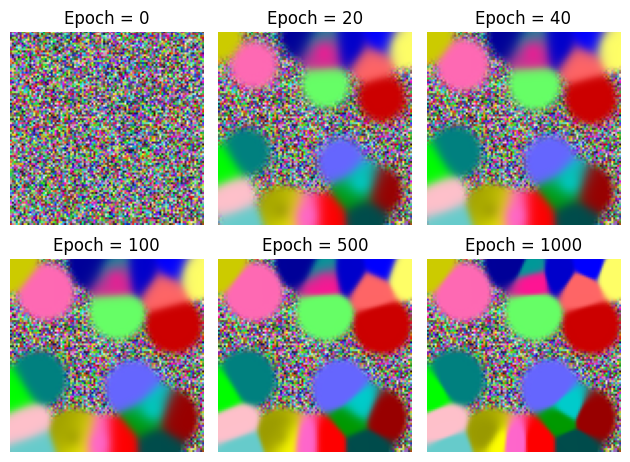

In [226]:
run(1)

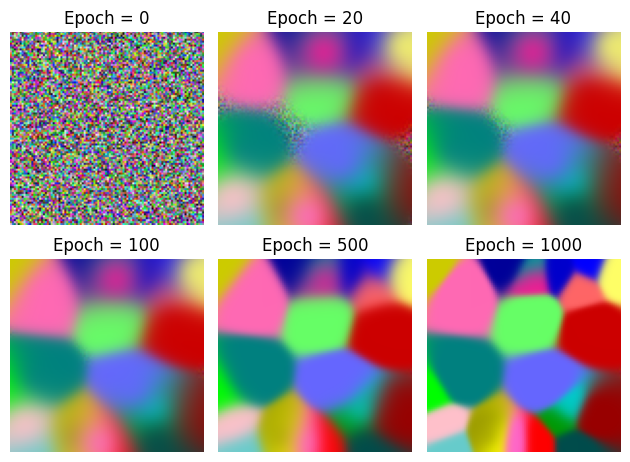

In [234]:
run(10)

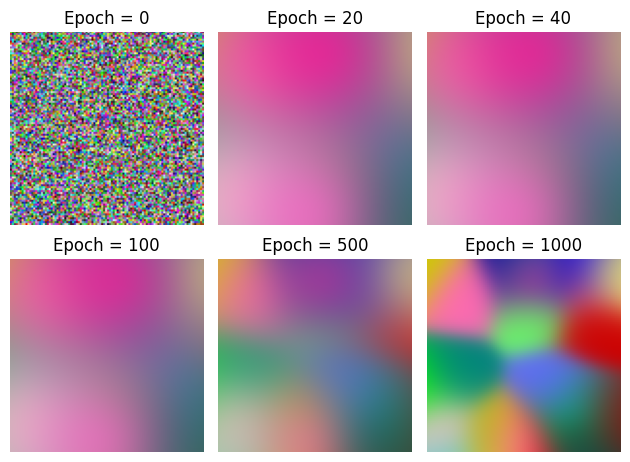

In [235]:
run(30)

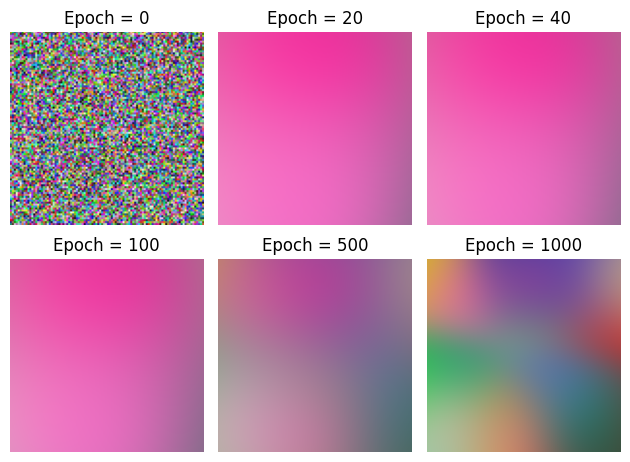

In [236]:
run(50)

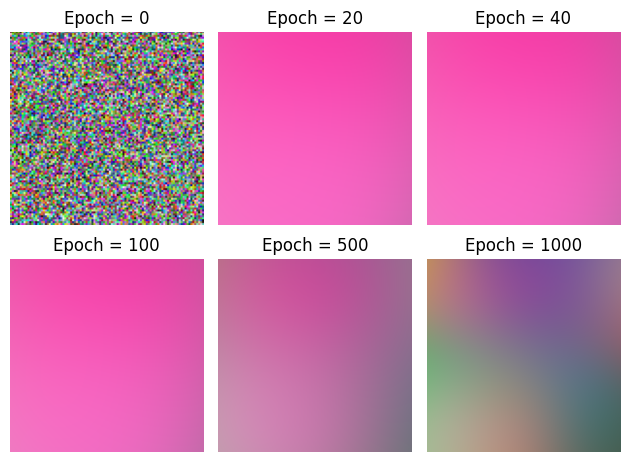

In [237]:
run(70)